In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import ( KMeans )
from sklearn.preprocessing import ( StandardScaler )
from scipy.cluster.hierarchy import ( dendrogram, linkage )

In [2]:
sns.set()

In [3]:
df_segmentation = pd.read_csv(
    'dataset/segmentation_data.csv', 
    index_col=0
)

In [4]:
# Query the data
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
# Coorelation Estimate
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


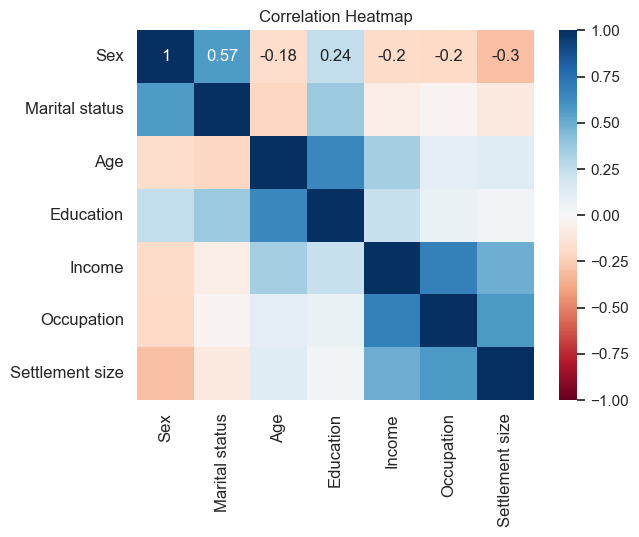

In [7]:
# Coorelation Heatmap plot
fig = sns.heatmap(
    df_segmentation.corr(),
    annot=True,
    cmap='RdBu',
    vmin=-1,
    vmax=1
)
# set labels
fig.set_yticklabels(
    fig.get_yticklabels(),
    rotation = 0,
    fontsize = 12
)
fig.set_xticklabels(
    fig.get_xticklabels(),
    rotation = 90,
    fontsize = 12
)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

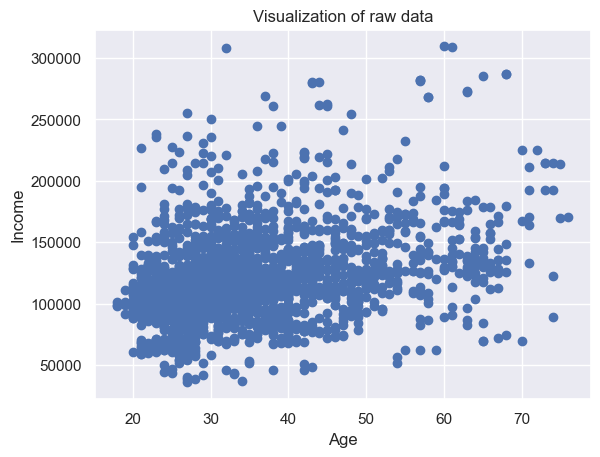

In [8]:
# Scatter plot code
plt.scatter(
    df_segmentation.iloc[:, 2],
    df_segmentation.iloc[:, 4]
)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

### Standardization

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

### Hierarchical clustering

In [10]:
hier_clust = linkage(
    segmentation_std, 
    method='ward'
)

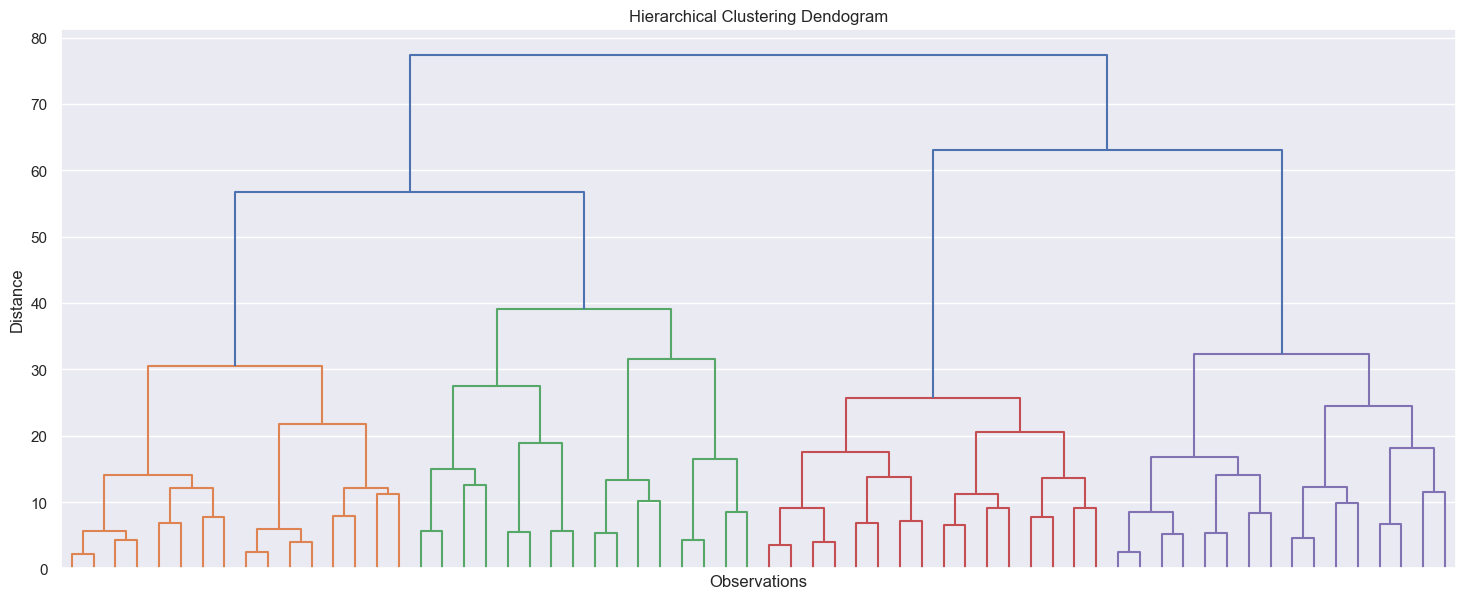

In [11]:
plt.figure(
    figsize=(
        18,7
    )
)

plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(
    hier_clust,
    truncate_mode='level',
    p=5,
    show_leaf_counts=False,
    no_labels=True
)

plt.show()

### K Mean Clustering

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42, n_init='auto')
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-mean Clustering')

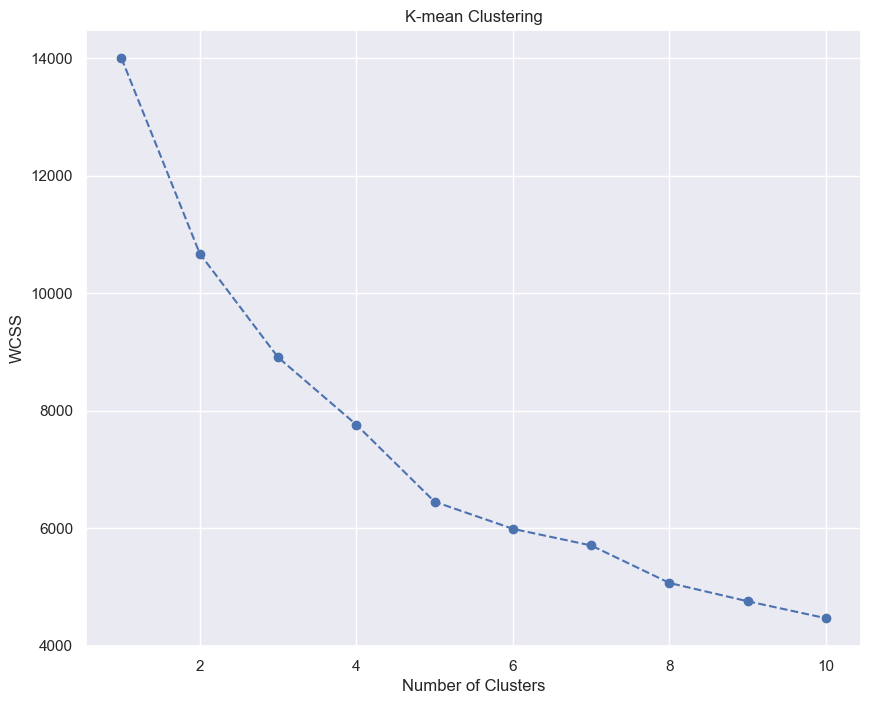

In [13]:
plt.figure(
    figsize=(
        10, 8
    )
)

plt.plot(
    range(1, 11),
    wcss,
    marker = 'o',
    linestyle = '--'
)

plt.xlabel(
    'Number of Clusters'
)

plt.ylabel(
    'WCSS'
)

plt.title('K-mean Clustering')

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state = 42)

In [15]:
kmeans.fit(segmentation_std)

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

### Results

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['segment_k_means'] = kmeans.labels_

In [17]:
df_segm_analytics = df_segm_kmeans.groupby(
    ['segment_k_means']
).mean()

df_segm_analytics

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment_k_means,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [18]:
df_segm_analytics['n_obs'] = df_segm_kmeans[
    ['segment_k_means', 'Sex']
].groupby(
    ['segment_k_means']
).count()

In [19]:
df_segm_analytics['prop_obs'] = df_segm_analytics['n_obs'] / df_segm_analytics['n_obs'].sum()
df_segm_analytics

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,prop_obs
segment_k_means,,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [20]:
df_segm_analytics.rename({
    0: 'standard',
    1: 'career_focused',
    2: 'fewer_opportunities',
    3: 'well_off'
})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,n_obs,prop_obs
segment_k_means,,,,,,,,,
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career_focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
fewer_opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
well_off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [21]:
df_segm_kmeans['labels'] = df_segm_kmeans['segment_k_means'].map({
    0: 'standard',
    1: 'career_focused',
    2: 'fewer_opportunities',
    3: 'well_off'
})

c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saurabh\Desktop\courses\customer_analytics\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

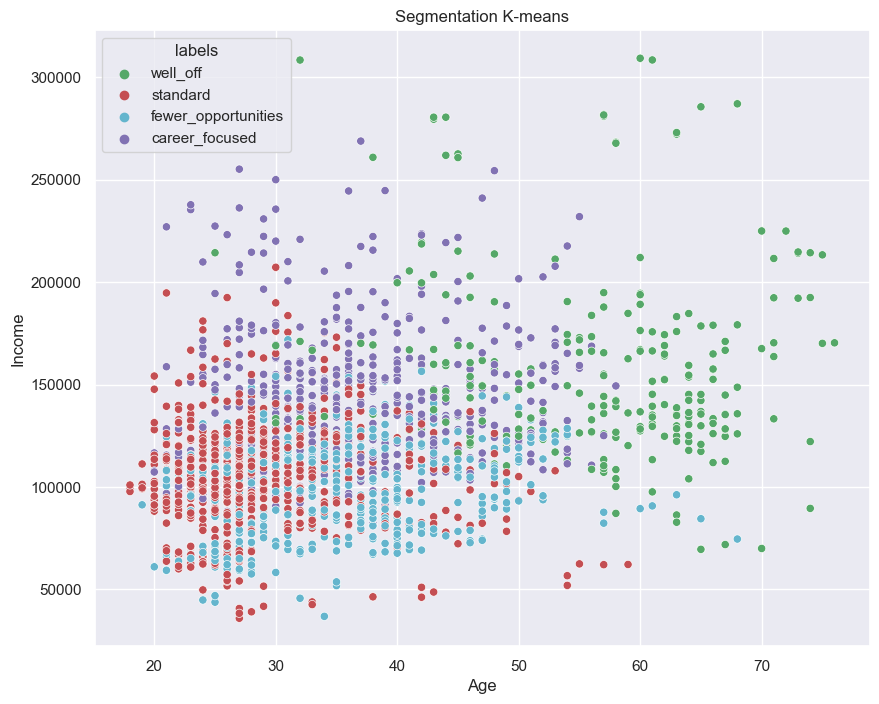

In [31]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']


plt.figure(
    figsize=(
        10, 8
    )
)

sns.scatterplot(
    x=x_axis,
    y=y_axis,
    hue = df_segm_kmeans['labels'],
    palette = ['g', 'r', 'c', 'm']
)

plt.title('Segmentation K-means')
plt.show()